## Predicting Health Insurance Charges using Regression

### Which factors influence the cost of health insurance in US?



### The Data:

This data is obtained from the Kaggle repository provided by Miri Cho. This data set has many factors that affect the cost of health insurance. The main objective for this data analysis is to find those features that mostly influence the cost of health insurance premium for a primary insurance benificiary.

The dataset has 1338 observations with 6 features and 1 target. Among the features there are 3 numeric and 3 categorical variable.

The feature variables and their description are as given:

__age__ - Age of primary beneficiary.

__bmi__ - is a measure of body fat based on height and weight that applies to adult men and women.

__children__ - Number of children covered by health insurance.

__sex__ - Insurance contractor gender: female, male.

__smoker__ - Whether the contractor is a smoker or not.

__region__ - The beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.

Target variable:

__charges__ - Individual medical costs billed by health insurance.


In [144]:
# Importing common libraries
import pandas as pd
import numpy as np

# Plotting pretty plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')

import warnings
warnings.filterwarnings("ignore")

# Testing out regressors
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


## Exploratory Analysis and Visualization

In [2]:
# Load the data into a dataframe
ins_df = pd.read_csv("data/insurance.csv")
ins_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
# Dimensions
ins_df.shape

(1338, 7)

In [4]:
# Looking at the data - data types and missing values
print(ins_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


There is no missing value in the data set. Data types are numerical and categorical. 

In [5]:
# Descriptive statistics of numeric features
ins_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


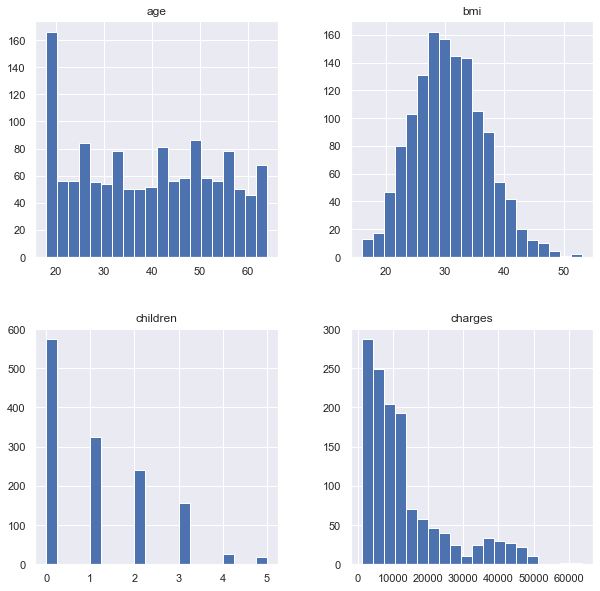

In [6]:
# Let's plot a histogram of the data
ins_df.hist(bins=20, figsize=(10,10))
plt.show()

Only the distribution of the bmi looks normal. Lets try to normalize the distribution of the charges

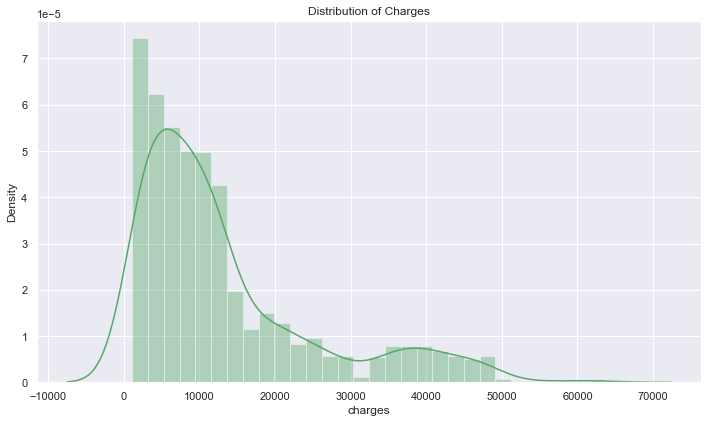

In [7]:
# Distribution of charges (target) before normalizing
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax = sns.distplot(ins_df['charges'], kde=True, color='g')
plt.tight_layout()
plt.title("Distribution of Charges")
plt.show()

The distribution is right skewed. Next will will apply log to try to normalize the distribution.

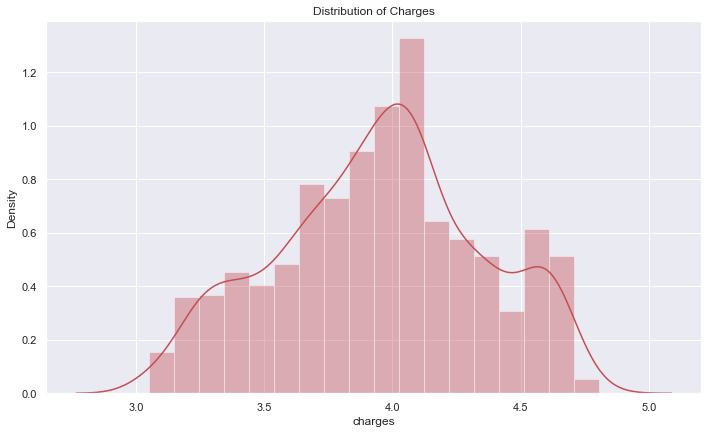

In [8]:
# Distribution of charges (target) after applying log
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax = sns.distplot(np.log10(ins_df['charges']), kde=True, color='r')
plt.tight_layout()
plt.title("Distribution of Charges")
plt.show()

After applying log distribution of charges looks more normalized.

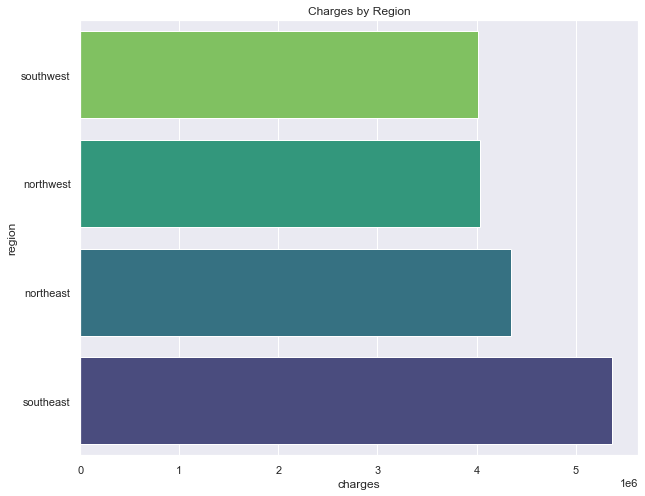

In [9]:
# Let's look at the charges by four regions
pd.set_option('display.float_format', '{:.2g}'.format)
charges = ins_df['charges'].groupby(ins_df['region']).sum().sort_values(ascending=True)
plt.figure(figsize=(10, 8))
sns.barplot(x=charges.head(), y=charges.head().index,palette='viridis_r')
plt.title("Charges by Region")
plt.show()

From the above plot we can see that health insurance charges are highest in the south-east region, followed by north-east. The north-west and the south-west regional health insurance charges are similar to each other.

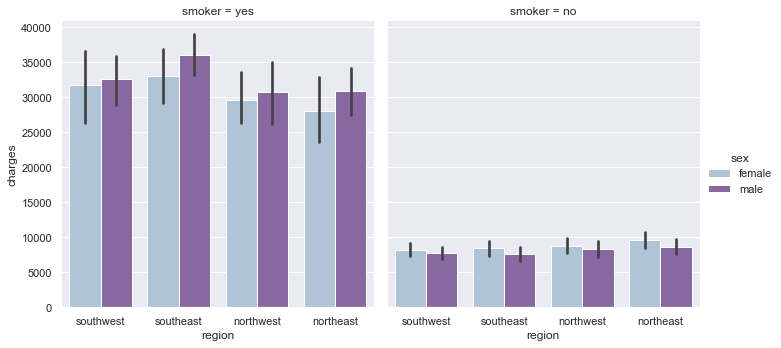

In [10]:
# Distribution of charges region wise for different genders
sns.factorplot(x='region', y='charges', data=ins_df,hue='sex',col='smoker',kind='bar', palette='BuPu')
plt.show()

The cost of health insurance mostly varies for different genders and regions, except for region north-west where the health insurance charges are somewhat same for both male and female genders. For the rest of the regions the health insurance charges are higher for males and lower for females.

We can also see that smoking is a high influencing factor for a high rise in the cost of health insurance, no matter which region. Non-smokers in general have to pay a significantly less price than smokers.

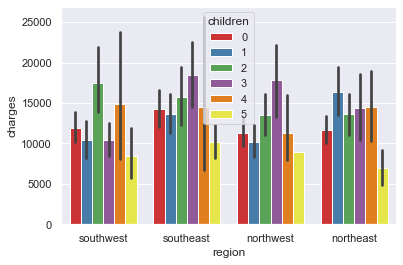

In [11]:
# Distribution of charges region wise for smokers and non smokers
sns.barplot(x='region', y='charges', data=ins_df,hue='children', palette='Set1')
plt.show()

Health insurance charges are low in all regions, when number of children are 5. Apart from that, having no children usually costs less for health insurance than having more children.

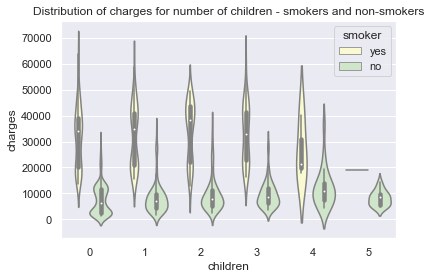

In [12]:
# Distribution of charges region wise for number of children
sns.violinplot(x='children',y='charges',data=ins_df,hue='smoker', palette='Pastel1_r')
plt.title("Distribution of charges for number of children - smokers and non-smokers")
plt.show()

Consious parents with children whether male or female, tends to smoke less. If they smoke, the price of health insurance rises no matter how many children they have. From the above plots we can see that smokers from all region, genders have to pay more for health insurance. 

Next, we will explore medical charges by age, bmi and children taking into the smoking factor.

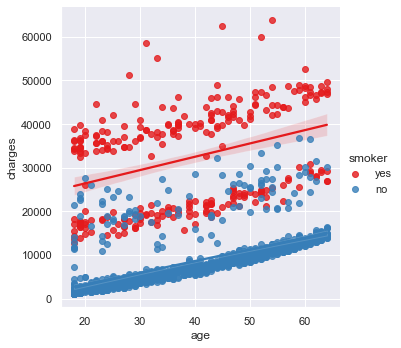

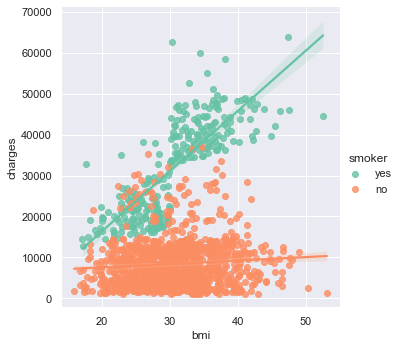

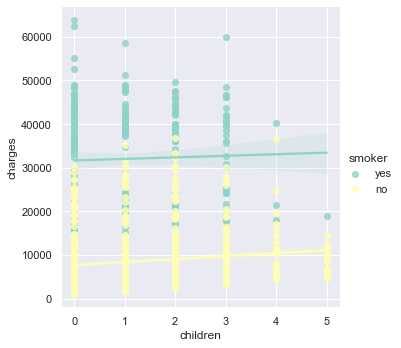

In [13]:
ax = sns.lmplot(x = 'age', y = 'charges', data=ins_df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=ins_df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=ins_df, hue='smoker', palette='Set3')

Here we can see that health insurance costs increase with age, bmi and children. Smokers have to pay the highest cost. And the combination of being a smoker with high bmi are high influencing factors for increase in medical charges. 

In [16]:
# Converting objects into categorical data type  for data pre-processing
ins_df[['sex', 'smoker','region']] = ins_df[['sex', 'smoker','region']].astype('category')
ins_df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [24]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(ins_df.sex.drop_duplicates())
ins_df.sex = label.transform(ins_df.sex)
label.fit(ins_df.smoker.drop_duplicates())
ins_df.smoker = label.transform(ins_df.smoker)
label.fit(ins_df.region.drop_duplicates())
ins_df.region = label.transform(ins_df.region)
ins_df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

region     -0.0062
sex          0.057
children     0.068
bmi            0.2
age            0.3
smoker        0.79
charges          1
Name: charges, dtype: float64


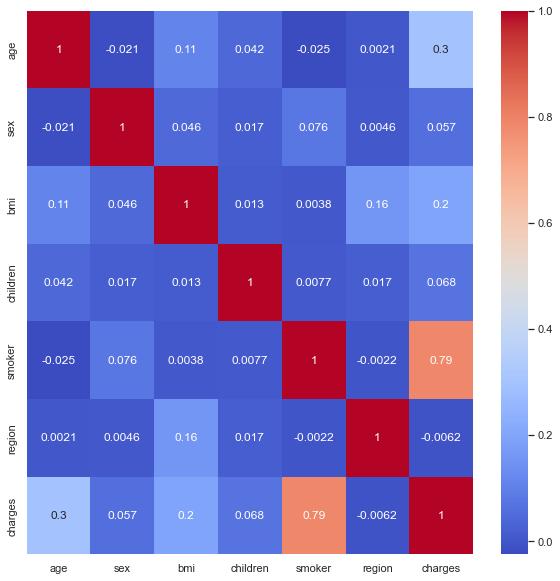

In [26]:
# Find correlating factors
corr_matrix = ins_df.corr()
print(corr_matrix['charges'].sort_values(ascending=True))
# Plot correlation
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm')
plt.show()

There is no correlation except for smoker

## Regression Models

In [27]:
#Splitting the data into X and y
X = ins_df.drop(['charges'], axis=1)
y = ins_df['charges'].copy()
print(X.shape)
print(y.shape)

(1338, 6)
(1338,)


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [55]:
#Splitting the data into train and test
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1070, 6) (1070,)
(268, 6) (268,)


### Linear Regression

In [64]:
# Fit a simple Linear Regression model
lm = LinearRegression()
lm_model = lm.fit(X_train, y_train)
lm_ypred = lm.predict(X_train)

print(lm_model.intercept_)
print(lm_model.coef_)
print(lm_model.feature_names_in_)
print("R2 score for training: ",lm_model.score(X_train, y_train))
print("R2 score for test: ",lm_model.score(X_test, y_test))


-11946.606567263012
[ 2.57056264e+02 -1.87914567e+01  3.35781491e+02  4.25091456e+02
  2.36478181e+04 -2.71284266e+02]
['age' 'sex' 'bmi' 'children' 'smoker' 'region']
R2 score for training:  0.7417049283233981
R2 score for test:  0.7833463107364539


The R2 score for both training and test looks good. We will try to see if this score improves with scaling the data, since input features mostly have different units of measure. 

In [81]:
# Fit a pipeline using training dataset after scaling the data
pipe = Pipeline([('scaler',StandardScaler()),('lm', LinearRegression())])
pipe.fit(X_train, y_train)
Pipeline(steps=[('scaler', StandardScaler()), ('lm', LinearRegression())])
pipe.score(X_test, y_test)
# Calculate the predicted value for training and test dataset
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
# Mean Squared Error
print('MSE train: %.3f, test: %.3f' % (np.sqrt(mean_squared_error(y_train, y_train_pred)),np.sqrt(mean_squared_error(y_test, y_test_pred))))
# R-Squared
print('R2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),
                r2_score(y_test, y_test_pred)))


MSE train: 6105.789, test: 5799.587
R2 train: 0.742, test: 0.783


Next we will fit our model with some popular regressors with not scaled (original data)

### Ridge Regression,  Lasso Regression and Elastic Net Regression

In [84]:
from sklearn.linear_model import Ridge

Ridge = Ridge(alpha=0.5)
Ridge.fit(X_train, y_train)
pred_train_ridge = Ridge.predict(X_train)
pred_test_ridge = Ridge.predict(X_test)
print("Ridge Intercept: ",Ridge.intercept_)
print("Ridge Coeff.: ",Ridge.coef_, '\n')
print("Ridge R2 Train:", Ridge.score(X_train, y_train))
print("RMSE Train: ",np.sqrt(mean_squared_error(y_train,pred_train_ridge)))
print("Ridge R2 Test:",Ridge.score(X_test, y_test))
print("RMSE Test: ",np.sqrt(mean_squared_error(y_test,pred_test_ridge)))


Ridge Intercept:  -11930.886105518452
Ridge Coeff.:  [ 2.56953795e+02 -1.49035393e+01  3.35787964e+02  4.25317646e+02
  2.35798187e+04 -2.71381009e+02] 

Ridge R2 Train: 0.7416997372947685
RMSE Train:  6105.850674765117
Ridge R2 Test: 0.7832200105774039
RMSE Test:  5801.277305099123


In [85]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.01, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=42, selection='cyclic')
Lasso.fit(X_train, y_train)
pred_train_lasso = Lasso.predict(X_train)
pred_test_lasso = Lasso.predict(X_test)
print("Lasso Intercept: ",Ridge.intercept_)
print("Lasso Coeff.: ",Ridge.coef_, '\n')
print("Laso R2 Train:",Lasso.score(X_train, y_train))
print("RMSE Train: ",np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print("Laso R2 Test:",Lasso.score(X_test, y_test))
print("RMSE Test: ",np.sqrt(mean_squared_error(y_test,pred_test_lasso)))

Lasso Intercept:  -11930.886105518452
Lasso Coeff.:  [ 2.56953795e+02 -1.49035393e+01  3.35787964e+02  4.25317646e+02
  2.35798187e+04 -2.71381009e+02] 

Laso R2 Train: 0.7417049283147286
RMSE Train:  6105.789320294083
Laso R2 Test: 0.7833460454550891
RMSE Test:  5799.590642086196


In [87]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=0.01)
enet.fit(X_train, y_train)
pred_train_enet = enet.predict(X_train)
pred_test_enet = enet.predict(X_test)
print("Elastic Net Intercept: ",enet.intercept_)
print("Elastic Net Coefficients: ",enet.coef_, '\n')
print("Elastic Net R2 Test:",enet.score(X_train, y_train))
print("Elastic Net RMSE Train: ",np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print("Elastic Net R2 Test:",enet.score(X_test, y_test))
print("Elastic Net RMSE Test: ",np.sqrt(mean_squared_error(y_test,pred_test_enet)))

Elastic Net Intercept:  -11782.54827783083
Elastic Net Coefficients:  [ 2.55989522e+02  2.09522302e+01  3.35847382e+02  4.27401788e+02
  2.29400027e+04 -2.72258414e+02] 

Elastic Net R2 Test: 0.741142477329963
Elastic Net RMSE Train:  6112.433542510574
Elastic Net R2 Test: 0.7815611393970026
Elastic Net RMSE Test:  5823.431635824678


The regularization techniques did not improve our model and has similar metric results. Next we will try Random Forest Regressor

### Random Forest Regression

In [99]:
from sklearn.ensemble import RandomForestRegressor
# Fir a model with Random Forest Regressor
rfr = RandomForestRegressor(n_estimators = 100,
                              random_state = 42,
                              n_jobs = -1)

rfr.fit(X_train,y_train)
pred_train_rfr = rfr.predict(X_train)
pred_test_rfr = rfr.predict(X_test)

print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(pred_train_rfr, y_train),
       metrics.mean_squared_error(pred_test_rfr, y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(pred_train_rfr, y_train),
       metrics.r2_score(pred_test_rfr, y_test)))

MSE train data: 3708028.280, MSE test data: 21073365.415
R2 train data: 0.972, R2 test data: 0.856


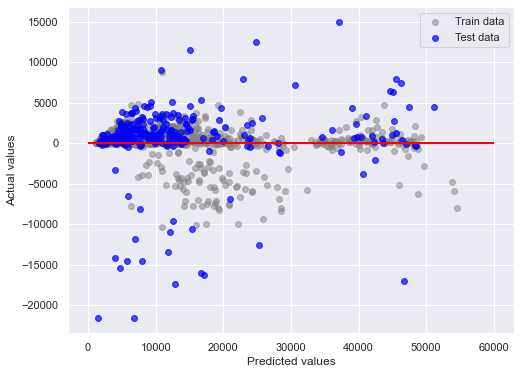

In [102]:
plt.figure(figsize=(8,6))

plt.scatter(pred_train_rfr, pred_train_rfr - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(pred_test_rfr, pred_test_rfr- y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')

 The metrics score for the Random Forest is better than the other model, but it doesn't generalize well. Let's hypertune some of the parameters to find the best estimators and important features.
 
 ## Random Forest Model Tuning

In [121]:
from sklearn.model_selection import GridSearchCV
# Tuning hyperparameter values by GridSearch
param_grid = [{'n_estimators': [50,100,150,200],'max_features':[2,4,6,8]},{'bootstrap': [False]}]
grid_search = GridSearchCV(rfr, param_grid, cv=5,scoring=['neg_mean_squared_error', 'r2'],refit='r2', return_train_score=True)
# Fit a model using gridsearchcv and chosen hyper-parameters
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [50, 100, 150, 200]},
                         {'bootstrap': [False]}],
             refit='r2', return_train_score=True,
             scoring=['neg_mean_squared_error', 'r2'])

In [122]:
# Best parameters, estimators
grid_search.best_params_

{'max_features': 2, 'n_estimators': 200}

In [112]:
# Create cv_results dictionary, with rmse of each feature combination for comparison. 
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

4908.504953033355 {'max_features': 2, 'n_estimators': 50}
4854.714035765918 {'max_features': 2, 'n_estimators': 100}
4840.610931745366 {'max_features': 2, 'n_estimators': 150}
4828.217298222637 {'max_features': 2, 'n_estimators': 200}
4854.25859518952 {'max_features': 4, 'n_estimators': 50}
4846.091514030352 {'max_features': 4, 'n_estimators': 100}
4846.604577772797 {'max_features': 4, 'n_estimators': 150}
4851.257917166211 {'max_features': 4, 'n_estimators': 200}
4955.432540235862 {'max_features': 6, 'n_estimators': 50}
4962.372520874765 {'max_features': 6, 'n_estimators': 100}
4965.917348446897 {'max_features': 6, 'n_estimators': 150}
4961.930324336572 {'max_features': 6, 'n_estimators': 200}
nan {'max_features': 8, 'n_estimators': 50}
nan {'max_features': 8, 'n_estimators': 100}
nan {'max_features': 8, 'n_estimators': 150}
nan {'max_features': 8, 'n_estimators': 200}
6405.112439925725 {'bootstrap': False}


The best parameters from our GridSearchCV model gave the lowest RMSE score of __4828.217298222637__

RMSE Score and best parameters: 4828.217298222637 {'max_features': 2, 'n_estimators': 200}

In [116]:
# Which features are important?
feature_importances = grid_search.best_estimator_.feature_importances_
attribs = list(X.columns) 
print(attribs)

['age', 'sex', 'bmi', 'children', 'smoker', 'region']


In [114]:
sorted(zip(feature_importances, attribs),reverse=True)

[(0.6016832849876775, 'smoker'),
 (0.17717853200284636, 'bmi'),
 (0.1564708258639288, 'age'),
 (0.029302766105501837, 'children'),
 (0.025125880759992603, 'region'),
 (0.010238710280052889, 'sex')]

Feature importance ranking


1.smoker(0.601683)
2.bmi(0.177179)
3.age(0.156471)
4.children(0.029303)
5.region(0.025126)
6.sex(0.010239)


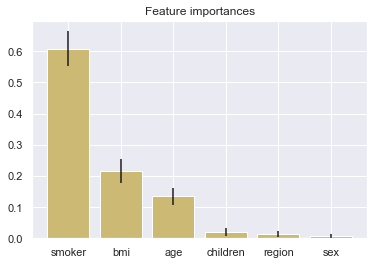

In [120]:
print('Feature importance ranking\n\n')
feature_importances = grid_search.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in grid_search.best_estimator_],axis=0)
indices = np.argsort(feature_importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(X.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, feature_importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")
plt.show()

### Polynomial Regression

In [127]:
# Create a training model using important features
Xb_train = X_train[['smoker','bmi','age']].copy()
Xb_test = X_test[['smoker','bmi','age']].copy()

### Prediction and accuracy check

In [142]:
from sklearn.preprocessing import PolynomialFeatures
# Fit a polynomial regression model with best features
Xb = ins_df.drop(['charges', 'sex', 'region'], axis = 1)
y = ins_df.charges
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(Xb)
x_train, x_test, y_train, y_test = train_test_split(x_pol, y, test_size=0.2, random_state=42)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_,'\n')
print("R2 Train: ",Pol_reg.score(x_train, y_train))
print("R2 Test: ",Pol_reg.score(x_test, y_test))

-4180.142342054971
[ 0.00000000e+00 -9.33620988e+01  5.05468577e+02  1.20881558e+03
 -1.01404993e+04  4.05237162e+00  1.13888105e+00 -4.06714756e+00
  7.44693387e+00 -8.71930163e+00  1.16586775e+00  1.44634383e+03
 -1.11858277e+02 -4.41516307e+02 -1.01404993e+04] 

R2 Train:  0.8367426415094439
R2 Test:  0.8670430253632888


In [143]:
# Evaluating the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 2773.5716510212496
Mean Squared Error: 20641401.655333314
Root Mean Squared Error: 4543.280935109925


In [139]:
# Predicting the charges
y_test_pred = Pol_reg.predict(x_test)
# Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
print(df)

      Actual  Predicted
764  9.1e+03      1e+04
887  5.3e+03    6.3e+03
890  2.9e+04    3.5e+04
1293 9.3e+03    1.1e+04
259  3.4e+04    2.9e+04
...      ...        ...
109  4.7e+04    4.6e+04
575  1.2e+04    1.3e+04
535  6.1e+03    7.6e+03
543  6.4e+04    5.9e+04
846  9.9e+03    1.2e+04

[268 rows x 2 columns]


R2 scores from trainand test polynomial model shows that there is no over fitting and the model generalizes well. 